In [1]:
import os
import boto3
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from io import StringIO

In [2]:
# Generate Unique List of Dealer ID's for all 12 months
BAC = []
for v in range(11111, 16111): BAC.append(v)

# Create List of Regions for Dealerships
RegionList= ['NORTHCENTRAL', 'NORTHEASTERN', 'WESTERN', 'SOUTHEASTERN', 'SOUTHCENTRAL'] * 1000

# Create DFs from lists
df1 = pd.DataFrame({ 'BAC':BAC,'Region': RegionList})
df2 = pd.DataFrame({'Month': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']})


    
# Create cross apply type functionality across all months and Dealers
dealerData = pd.merge(df1.assign(tmp=1),
                     df2.assign(tmp=1), on='tmp').drop('tmp', 1)

In [3]:
# Create normalized distributions with means as national average
# Arbitrary st dev values are given to simulate data spread seen in field

closeRate = np.sort(np.random.normal(10.1, 1.8, size=60000))
sdsv = np.sort(np.random.normal(1.8, 0.4, size=60000))
salesLoyaly = np.sort(np.random.normal(88.1, 4, size=60000))
responded30Min = np.sort(np.random.normal(64.3, 11, size=60000))
                         
# Create Sales Number distribution using ordered random generated values
sales = np.sort(np.random.randint(low = 5, high = 150, size=60000))

# Combine data into dataframe
df = pd.DataFrame({ 'BAC': dealerData[dealerData.columns[0]]
                   ,'Region': dealerData[dealerData.columns[1]]
                   ,'Month': dealerData[dealerData.columns[2]]
                   ,'CloseRate':closeRate
                   ,'SDSVCloseRate':sdsv
                   ,'SalesLoyalty':salesLoyaly
                   ,'Responded30Min':responded30Min
                   ,'Sales':sales})

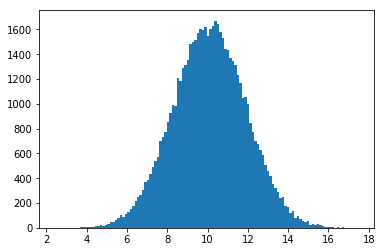

In [4]:
plt.hist(closeRate, bins='auto')
plt.show()

In [5]:
# Create CSV from DataFrame
df.to_csv('Managing_Leads_2020.csv')

In [ ]:
# Send data set to S3 bucket
client = boto3.client('s3')

client.upload_file(
    Filename = 'Generated_Leads_2018.csv', 
    Bucket = 'generated-data-sales-generating', 
    Key = 'genLeadsOct2018.csv',
    ExtraArgs = {
      'StorageClass': 'STANDARD_IA'
    }
)